In [42]:
# Import packeages, read files, set bounds and inverse power function

import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.optimize import curve_fit
import numpy as np # need for linspace in plot
from statistics import mean
import statistics
import time
import math
import json
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from sklearn.linear_model import LinearRegression
pd.options.display.max_rows = 500

colors = pd.read_csv('TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('sample_response_DF_20210805.tsv',
                                          sep = '\t')

lower = [0,-1000,-1]
upper = [.5,1000,0]

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [92]:
# Confidence for 
n = len(full_response)
z = 1.96
s = statistics.stdev(differences)
xbar = mean(differences)
diff_up = xbar + z * (s/math.sqrt(n))
diff_low = xbar - z * (s/math.sqrt(n))
print('Underestimation confidendce:')
print(str(round(xbar,3)) + ' +/- '+str(round(z * (s/math.sqrt(n)),3)))

Underestimation confidendce:
-0.015 +/- 0.009


In [ ]:
# Working toward "decay correction factor"
decay_paramter_list = [] # Put in tuples of floors and ceilings

In [ ]:
# Use linear regresseion parameter predcition as third validation

In [222]:
full_responseX = [('COADREAD', 4)]

In [225]:
full_responseX = [('GEA', 6)]

In [230]:
front_end_mean_params[0]

8.814718659356043e-10

In [362]:
full_responseX = [('BRCA', 2)]

In [341]:
full_response

[('BLCA', 1),
 ('BRCA', 2),
 ('COADREAD', 4),
 ('GEA', 6),
 ('HNSC', 7),
 ('KIRCKICH', 8),
 ('LGGGBM', 10),
 ('LIHCCHOL', 11),
 ('LUAD', 12),
 ('LUSC', 13),
 ('OV', 15),
 ('PRAD', 18),
 ('SKCM', 20),
 ('THCA', 22),
 ('UCEC', 24)]

In [344]:
full_responseX = [('KIRCKICH', 8)]

In [370]:
full_responseX = [('BLCA', 1)] #13,4 # search fitting ranges and parmeter cuts

In [399]:
predict_test_srs = pd.Series

In [400]:
predict_test_srs

pandas.core.series.Series

('BLCA', 1)
done


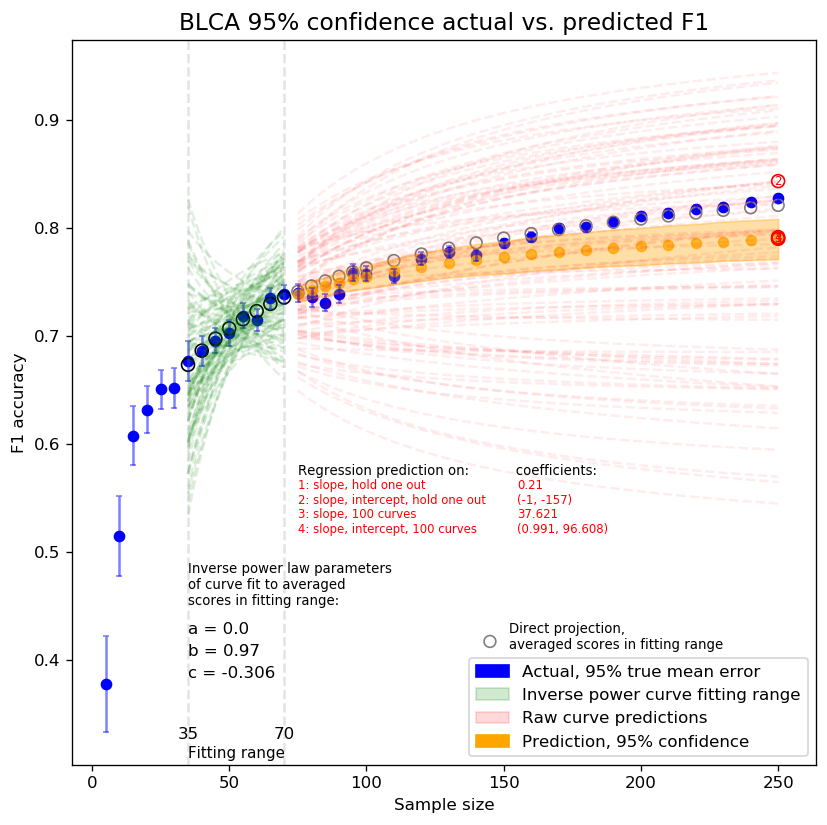

In [412]:
# Full loop
differences = []
slope_list = []
intercept_list = []
# point_1 = [] # Want actual values, or intercept
# point_2 = []
# intercepts = [] # b in y = mx +b, b = y - mx
fit_list = []
parameter_dict = {}                         # full_responseX devel on single cohort
for idx, cohort_tuple in enumerate(full_responseX): # list of cohorts and indices
    # Make slope table
    # Make paramater table
    # Make lin reg prediction
    # Convert linear regression prediction to paramter value (fix parameter)
    c_prm_dcy_floor = -.95
    c_prm_dcy_ceil = -.01
    
    lower = [0,-1000,-1]
    upper = [.5,1000,0]
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]
#     break

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()}
    
    accuracy_response = sorted(accuracy_response_dct.items())

    # List of full sample sizes and scores
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)):
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [] # * Using this
    for j in list(range(sample_max,len(accuracy_response))):
#         actual_scores.append(accuracy_response[j][1])
        prediction_samples.append(accuracy_response[j][0])

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])

    CI_upper = []
    CI_lower = []
    n1 = 100
    full_std = [] # list of stdev
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
        xbar = round(mean(score_set), 3) # yes
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
        full_std.append(s) # not used
        CI_up = xbar + z * (s/math.sqrt(n1))
        CI_upper.append(CI_up)
        CI_low = xbar - z * (s/math.sqrt(n1))
        CI_lower.append(CI_low)  
        CI_range.append(z * (s/math.sqrt(n1)))

    # Errorbars for sampling error
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
    
    # Set up for slope: use first/last average front curve ************************************************ AVERAGE section
    # also can use first/last or raw or first/last in range of fully fit curve
    # how to use yacc?
    slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])
    x_fit_slope = np.linspace(fitting_samples[0], fitting_samples[-1], len(fitting_samples))
    y_fit_slope = Y_acc(x_fit_slope, *front_end_mean_params)
    ax.scatter(x_fit_slope, y_fit_slope, s=60, facecolors='none', edgecolors='black')
    
    parameter_dict[cohort_index] = front_end_mean_params # add to parameter dict
    
    slope_ave = (y_fit_slope[-1] - y_fit_slope[0])/(x_fit_slope[-1] - x_fit_slope[0])
    slope_list.append(slope_ave)
    
    intercept_ave = y_fit_slope[0] - slope_ave * x_fit_slope[0]
    intercept_list.append(intercept_ave)
    
    fit_list.append(y_fit)
    
    # Grey dot projection, based on average curve
    project = Y_acc(prediction_samples, *front_end_mean_params)
    ax.scatter(prediction_samples, project, s=50, facecolors='none', edgecolors='grey')
    
    # Grey dot confidence interval - only one sample for n
    grey_up = []
    grey_low = []
    n=1

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    slopes_100 = []
    intercepts_100 = []
    y_final_100 = []
    orange_vs_grey = []
    down_curves = []
    down_curves_srs = pd.Series(dtype = 'float64')
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        slope = (y_fit[-1] - y_fit[0])/(x_fit[-1] - x_fit[0])
        slopes_100.append(slope)
        intercept = y_fit[0] - slope * x_fit[0]
        intercepts_100.append(intercept)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # Fit to each param set
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])
        
        diff = y_predict[0]-y_predict[-1]
        down_curves.append(diff)
    
    slopeDF_100 = pd.DataFrame()
    slopeDF_100['Intercept'] = intercepts_100
    slopeDF_100['Slope'] = slopes_100
    
    # need target: y                                # Regression zone ************************************
    X_100 = slopeDF_100 # dot 4
    reg_100 = LinearRegression().fit(X_100, y_final_100)
    # print coefficient and make prediction by fixing limit table
    y_star4 = reg_100.predict(np.array((intercept_ave, slope_ave)).reshape(1, -1))
    

    X_only_slope = slopeDF_100['Slope'] # 3
    reg_only_slope = LinearRegression().fit(np.array(X_only_slope).reshape(-1,1), y_final_100)
    # print coefficient and make prediction by fixing limit table
    y_star3 = reg_only_slope.predict(np.array(slope_ave).reshape(1, -1))
    
    # Check with mean, use to automate validation (?) 
    mean_predictions = np.mean(y_predictions, axis = 0)
    mpl = list(mean_predictions)
    difference = []
    zip_object = zip(mpl[-5:], full_scores[-5:])
    for list1_i, list2_i in zip_object:
        difference.append(list1_i-list2_i)
    differences.append(mean(difference))
    
    # Orange and grey                               ############### compare predictions and cut inverted curves to push up prediction
    orange_curve = np.mean(y_predictions, axis = 0)

    og_difference = []
    zip_object = zip(orange_curve[-5:], project[-5:]) # check against last five points on two most stable prediction curves
    for list1_i, list2_i in zip_object:
        og_difference.append(list1_i-list2_i)
        
        
    orange_vs_grey.append(mean(og_difference)) # might be unnecessary 
    
    

    y_std = np.std(y_predictions, axis = 0) # Element wise

    pre_CI_upper = []
    pre_CI_lower = []
    n2 = 100 # report this number
    for k, prdt_score_set in enumerate(np.mean(y_predictions, axis = 0)): # 
        xbar = round(prdt_score_set, 3)
        z = 1.96 # 95%
        s = y_std[k]
        pre_CI_up = xbar + z * (s/math.sqrt(n2))
        pre_CI_upper.append(pre_CI_up)
        pre_CI_low = xbar - z * (s/math.sqrt(n2))
        pre_CI_lower.append(pre_CI_low) 

    plt.scatter(prediction_samples, np.mean(y_predictions, axis = 0), alpha = .75,
               color = 'orange')

    ax.fill_between(prediction_samples,
                pre_CI_upper,
                pre_CI_lower,
                alpha = .35, color = 'orange') # Plot orange bar

    plt.title(cohort +
        ' 95% confidence actual vs. predicted F1',
        fontsize = 14)
    ax.set_xlabel('Sample size')
    ax.set_ylabel('F1 accuracy')
    
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error')
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    patch_4 = mpatches.Patch(color='orange', label='Prediction, 95% confidence')
    plt.legend(handles=[patch_1, patch_2, patch_3, patch_4], loc = 4)
    
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))
    
#     plt.text(xfit2+3, ylims[0]+.27 * y_rng, 'regression on\nslope coeff = '+
#              str(round(reg_only_slope.coef_[0],3)))
#     plt.text(xfit2+3, ylims[0]+.2 * y_rng, 'regression on\nslope and intercept coeffs = ('+
#              str(round(reg_100.coef_[0], 3))+', '+str(round(reg_100.coef_[1], 3))+')') 

    ax.text(155, ylims[0]+.32* y_rng, '('+str(round(reg_100.coef_[0], 3))+', '+str(round(reg_100.coef_[1], 3))+')', color ='red', fontsize = 7) 
    ax.text(155, ylims[0]+.34* y_rng, str(round(reg_only_slope.coef_[0],3)), color ='red', fontsize = 7)   
    ax.text(155, ylims[0]+.36* y_rng, '('+str(round(coefs2[idx][0]))+', '+str(round(coefs2[idx][1]))+')', color ='red', fontsize = 7)
    ax.text(155, ylims[0]+.38* y_rng, round(coefs1[idx][0],3), color ='red', fontsize = 7)    
    
    ax.text(75, ylims[0]+.32* y_rng, '4: slope, intercept, 100 curves', color ='red', fontsize = 7)
    ax.text(75, ylims[0]+.34* y_rng, '3: slope, 100 curves', color ='red', fontsize = 7)
    ax.text(75, ylims[0]+.36* y_rng, '2: slope, intercept, hold one out', color ='red', fontsize = 7)
    ax.text(75, ylims[0]+.38* y_rng, '1: slope, hold one out', color ='red', fontsize = 7)
    ax.text(75, ylims[0]+.4* y_rng, 'Regression prediction on:           coefficients:', fontsize = 8)
    
    ax.scatter(145, ylims[0]+.17 * y_rng, s=50, facecolors='none', edgecolors='grey')
    ax.text(152, ylims[0]+.16* y_rng, 'Direct projection,\naveraged scores in fitting range', fontsize = 8)
# # Original prediction on slope and 3 parameters
#     ax.text(prediction_samples[-1], y_hats[idx], '4', 
#             ha = 'center', va = 'center', color ='red', fontsize = 7)
#     ax.scatter(prediction_samples[-1], y_hats[idx], s=60,
#                facecolors='none', edgecolors='red')

# Prediction on slope, hold one out
    ax.text(prediction_samples[-1], y_hats1[idx], '1',  # Dot one, just slope
            ha = 'center', va = 'center', color ='red', fontsize = 7)
    ax.scatter(prediction_samples[-1], y_hats1[idx], s=60,
               facecolors='none', edgecolors='red')
    
# Prediction on slope and intercept, hold one out     # This is dot 2 *********
    ax.text(prediction_samples[-1], y_hats2[idx], '2', 
            ha = 'center', va = 'center', color ='red', fontsize = 7)
    ax.scatter(prediction_samples[-1], y_hats2[idx], s=60,
               facecolors='none', edgecolors='red')
    
 ## Prediction on slope, fit 100 curves within cohort     
    ax.text(prediction_samples[-1], y_star3[0], '3', 
            ha = 'center', va = 'center', color ='red', fontsize = 7)
    ax.scatter(prediction_samples[-1], y_star3[0], s=60,
               facecolors='none', edgecolors='red')
 
 ## Prediction on slope and intercept, fit 100 curves within cohort 
    ax.text(prediction_samples[-1], y_star4[0], '4', 
            ha = 'center', va = 'center', color ='red', fontsize = 7)
    ax.scatter(prediction_samples[-1], y_star4[0], s=60,
               facecolors='none', edgecolors='red')
    
    # Linear regression, done in v6

    plt.savefig('fixed_fitting_range.'+cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode

print('done')

In [413]:
np.mean(y_predictions_srs, axis = 0)

array([0.73877847, 0.74279541, 0.74639373, 0.74963905, 0.7525837 ,
       0.75526997, 0.75999946, 0.76403893, 0.76753728, 0.77060261,
       0.77331547, 0.77573714, 0.77791518, 0.77988706, 0.78168278,
       0.78332663, 0.78483851, 0.7862349 , 0.78752957, 0.78873412,
       0.78985842])

In [397]:
og_difference

[-0.026595910886094698,
 -0.02786768381332061,
 -0.029087269279041705,
 -0.03025807671356351,
 -0.031383252345575596]

In [414]:
orange_vs_grey # orange starts at 3 points below grey

[-0.029038438607519222]

In [415]:
len(down_curves)

100

In [418]:
while orange_vs_grey[0] < .01:
    print('yes')
    max_value = max(down_curves)
    curve_idx_to_cut = down_curves.index(max_value)
    del y_predictions_srs[str(curve_idx_to_cut)] # fail, index changes as elements are cut in y loop, need series
    orange_curve = np.mean(y_predictions_srs, axis = 0)
    o_mean_last_five = mean(orange_curve[-5:])
    g_mean_last_five = mean(project[-5:])
    orange_vs_grey = g_mean_last_five - o_mean_last_five

yes


KeyError: '26'

In [ ]:
    # Orange and grey                               ############### compare predictions and cut inverted curves to push up prediction
    orange_curve = np.mean(y_predictions, axis = 0)

    og_difference = []
    zip_object = zip(orange_curve[-5:], project[-5:]) # check against last five points on two most stable prediction curves
    for list1_i, list2_i in zip_object:
        og_difference.append(list1_i-list2_i)
        
        
    orange_vs_grey.append(mean(og_difference)) # might be unnecessary 

In [390]:
max_value = max(down_curves)

In [391]:
down_curves.index(max_value)

26

In [384]:
orange_vs_grey

[-0.029038438607519222]

In [380]:
type(project)

numpy.ndarray

In [382]:
project[-5:]

array([0.81143442, 0.81410258, 0.81661684, 0.8189922 , 0.82124167])

In [379]:
len(y_predictions[0])

21

In [377]:
y_predictions[26][0]-y_predictions[26][1]

0.009354246242106456

In [304]:
fitDF

,Intercept,Slope,Min_achvble_err,Lrn_rate,Dcay_rate,End_vals,Cohort
0,0.613604,0.001764,2.417603e-17,1.057920,-0.327697,0.764203,"(BLCA, 1)"
1,0.743522,0.001749,5.041871e-02,3.373611,-0.870285,0.764203,"(BRCA, 2)"
2,0.597109,0.002259,1.769625e-01,5.139877,-1.000000,0.849212,"(COADREAD, 4)"
3,0.499347,0.002713,8.814719e-10,1.816625,-0.415596,0.771926,"(GEA, 6)"
4,0.520319,0.002984,1.812717e-01,6.788816,-1.000000,0.705140,"(HNSC, 7)"
5,0.913167,0.000669,1.321529e-02,1.873898,-1.000000,0.706770,"(KIRCKICH, 8)"
6,0.733508,0.001140,3.810459e-22,0.669207,-0.300457,0.963485,"(LGGGBM, 10)"
7,0.645131,0.002101,1.237839e-01,5.882165,-1.000000,0.798546,"(LIHCCHOL, 11)"
8,0.537249,0.002208,2.029568e-01,4.286330,-0.872564,0.801811,"(LUAD, 12)"
9,0.519774,0.002177,2.407265e-01,6.096348,-1.000000,0.734346,"(LUSC, 13)"


In [308]:
# 2 slope and intercept
cut = 2
results2 = []
intercepts2 = []
coefs2 = []
y_hats2 = []
diffs2 =[]

for i in fitDF.index:
    hold_out = pd.DataFrame(fitDF.iloc[i,:]).copy().T
    fitDF_drop = fitDF.drop(i, axis = 0)
    X = fitDF_drop.iloc[:,0:cut]
    y = fitDF_drop['End_vals']
    reg2 = LinearRegression().fit(X, y)
    x = pd.DataFrame(hold_out.iloc[0, 0:cut]).T
    y_hat = reg2.predict(x)
    y_hats2.append(y_hat)
    results2.append((fitDF.iloc[i,5], hold_out['End_vals'] - y_hat))
    diff = round(float(hold_out['End_vals'] - y_hat), 3)
    diffs2.append(diff)
    intercepts2.append(reg2.intercept_)
    coefs2.append(reg2.coef_)

In [349]:
# 1 independant variable - need intercept too?
cut = 1
results1 = []
intercepts1 = []
coefs1 = []
y_hats1 = []
diffs1 =[]

for i in fitDF.index:
    hold_out = pd.DataFrame(fitDF.iloc[i,:]).copy().T
    fitDF_drop = fitDF.drop(i, axis = 0)
    X = fitDF_drop.iloc[:,0:cut]
    y = fitDF_drop['End_vals']
    reg1 = LinearRegression().fit(X, y)
    x = pd.DataFrame(hold_out.iloc[0, 0:cut]).T
    y_hat = reg1.predict(x)
    y_hats1.append(y_hat)
    results1.append((fitDF.iloc[i,5], hold_out['End_vals'] - y_hat))
    diff = round(float(hold_out['End_vals'] - y_hat), 3)
    diffs1.append(diff)
    intercepts1.append(reg1.intercept_)
    coefs1.append(reg1.coef_)

In [ ]:
# fit parameters to actual (?)

In [266]:
# 4 independant variables
from sklearn.linear_model import LinearRegression
results = []
intercepts = []
coefs = []
y_hats = []
diffs4 =[]
for i in fitDF.index:
#     print(i)
    hold_out = pd.DataFrame(fitDF.iloc[i,:]).copy().T
    fitDF_drop = fitDF.drop(i, axis = 0)
    X = fitDF_drop.iloc[:,0:4]
    y = fitDF_drop['End_vals']
    reg = LinearRegression().fit(X, y)
#     break
    x = pd.DataFrame(hold_out.iloc[0, 0:4]).T
    y_hat = reg.predict(x)
    y_hats.append(y_hat)
    results.append((fitDF.iloc[i,5], hold_out['End_vals'] - y_hat))
    diff = round(float(hold_out['End_vals'] - y_hat), 3)
    diffs4.append(diff)
    intercepts.append(reg.intercept_)
    coefs.append(reg.coef_)

In [ ]:
# Predict
for cohort_tuple in under_sampled:
    # Begin prediction on low-sample count courts (apply method)

In [ ]:
# Interpretation note:
# If the prediction error cone increases, distance from fitting window drives error

In [114]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting route notes:
# Build training curves - plot 70
# Build corresponding parameter table (train on 70)
# Predict y at each point in the prediction window
    # Get list of prediction points

In [ ]:
# Big loop, omit actuals for small cancers
# partial for partial cancers?

In [ ]:
# End within cancer method

In [ ]:
# Begin between cancer method

In [ ]:
# Code park
z_sandbag = 1.645 # 90

In [ ]:
# v3 reference blocks:

In [6]:
cohort_index = 3 # Toggle cohorts

# Set cohort and load primary accuracy response object
cohort = sample_response_DF.iloc[cohort_index,0]
print(cohort)

accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()}

CESC


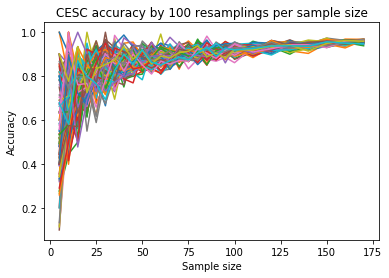

In [7]:
# Create list of tuples
accuracy_response = sorted(accuracy_response_dct.items())

# Inspect the 100 raw scores per sample size
x, y = zip(*accuracy_response) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title(cohort+' accuracy by 100 resamplings per sample size')
plt.xlabel('Sample size')
plt.ylabel('Accuracy')
plt.savefig(cohort + '_raw_data.png')
plt.show()

Sample size fitting threshold on front of curve: 45


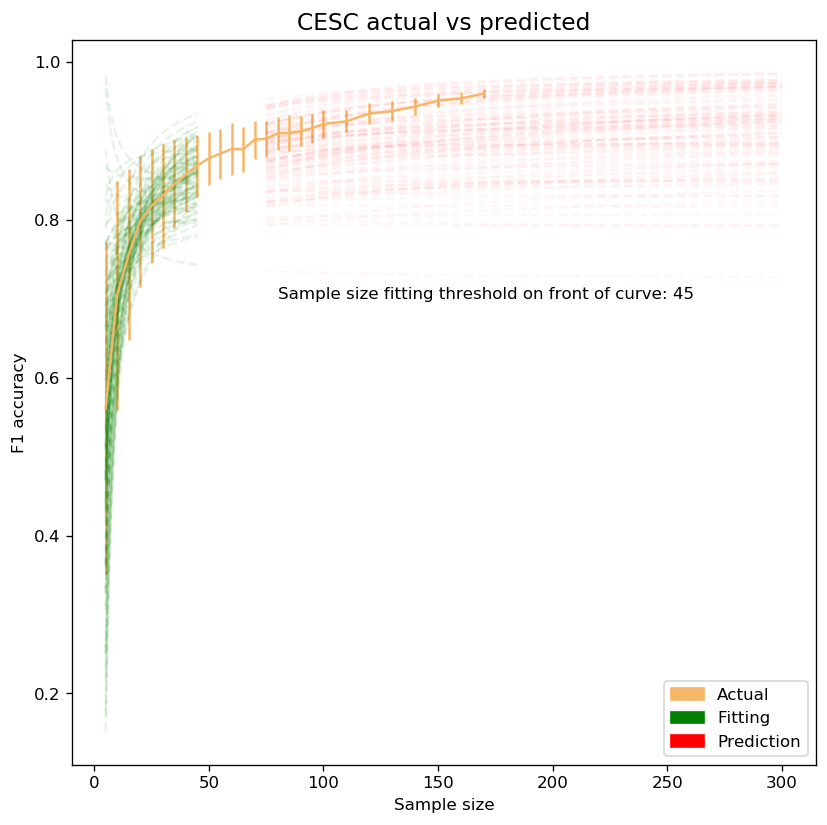

In [8]:
# Un-nest fitting loop from prediction loop

prediction_sample_sizes = [75,100,125,150,175,200,225,250,275,300] # template for automation of max sample size for fitting
prediction_curve_x = np.linspace(75, 300, 100)
sample_sizes = list(i[0] for i in accuracy_response)

predictions = []
conf_95 = []
conf_90 = []
CI_upper = []
CI_lower = []
stdev = []
stdev_upper = []
stdev_lower = []

sampling_threshold = 8 # Toggle threshold by index of index of upper limit sample size
front_end_fitting_cutoff = sample_sizes[sampling_threshold]
print('Sample size fitting threshold on front of curve: ' + str(front_end_fitting_cutoff))

actual_scores = []
for i in accuracy_response:
    actual_scores.append(mean(i[1]))
      
stdevs = []
for i in accuracy_response:
    stdevs.append(statistics.stdev(i[1]))

# Setup plot
fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
color_shard = colors[colors.Cohort == cohort]
colr = color_shard.iloc[0,1]

# Plot actual with standard deviation
ax.errorbar(sample_sizes,
            actual_scores,
            yerr = stdevs, color = colr, alpha = .99)
      
# Curve fitting to front end of curves
front_end_parameters = {}
y_predictions = []
for resampling_idx in list(range(0,100)):

    scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

    for tuple_n in accuracy_response:
        scores_temp.append(tuple_n[1][resampling_idx])
#     print('scores temp: ' + str(scores_temp))

    front_end_param_set_n, _ = curve_fit(Y_acc,
                             sample_sizes[0:sampling_threshold],
                             scores_temp[0:sampling_threshold],
                                bounds=[lower,upper])
    front_end_parameters[resampling_idx] = front_end_param_set_n
    
    # Now, plot all 100 front-end fitting curves and compare to actual 
    x_fit = np.linspace(sample_sizes[0], front_end_fitting_cutoff, 50)
    y_fit = Y_acc(x_fit, *front_end_param_set_n)
    ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .09)
      
    y_predict = Y_acc(prediction_curve_x, *front_end_param_set_n)
    ax.plot(prediction_curve_x, y_predict, '--', color = 'red', alpha = .03)
    y_predictions.append(y_predict)
# average_prediction
          
ax.set_xlabel('Sample size')
ax.set_ylabel('F1 accuracy')
plt.title(cohort +
    ' actual vs predicted',
    fontsize = 14)
patch_1 = mpatches.Patch(color=colr, label='Actual')
patch_2 = mpatches.Patch(color='green', label='Fitting')
patch_3 = mpatches.Patch(color='red', label='Prediction')
plt.legend(handles=[patch_1, patch_2, patch_3])
plt.text(80, .7, 'Sample size fitting threshold on front of curve: ' + str(front_end_fitting_cutoff))
plt.savefig(cohort + '_'+str(front_end_fitting_cutoff)+ '_predict_v3.png')
plt.show()

In [104]:
# Code parking lot
# Save front-end of curve parameters to make 100 predictions at sample sizes beyond the fitting range
front_endDF = pd.DataFrame(front_end_parameters).transpose()
front_endDF.columns = ['a','b','c']